<html>
<head>
	<title></title>
</head>
<body>
<h1 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h1>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №2</h2>

<h3 style="text-align: center;line-height: 80%;"><em>НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР. МЕТОД ОПОРНЫХ ВЕКТОРОВ </em></h3>
    
<h3 style="text-align: center;line-height: 60%;"><em>по дисциплине: "Применение искусственного интеллекта в электроэнергетике"   </em></h3>

    
<p style="text-align: right;line-height: 40%;"> Выполнил: студент группы Э-13м-19</p>

<p style="text-align: right;line-height: 40%;">Антонов И.И.</p>

<p style="text-align: right;line-height: 40%;">Принял: Нухулов С.М.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2020</em></h3>
</body>
</html>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn import feature_extraction 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics 
from sklearn.svm import SVC 

## Пункт 1

In [2]:
# Загрузка и предобработка данных
data = pd.read_csv('spam.csv', encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace = True)
data.head()

P(A/B) = P(B/A) * P(A) / P(B)

P(C/d) = P(d/C) * P(C) / P(d)  log(P(w1/c) * *)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def removeStopWords(s):
    for i in stopwords.words('english'):
        if i in s.strip().split():
            s = s.replace(i,'')
    return s.strip()

In [5]:
dictionary = '1234567890'

In [6]:
def removeNumericalSequence(s):
    new_str = ''
    count = 0
    for i in s:
        if (i in dictionary) and (count == 0):
            new_str += '1'
            count += 1
        elif (i in dictionary) and (count > 0):
            count += 1
        else:
            new_str += i
            count = 0
    return new_str

In [8]:
#уменьшение текста до строчных букв
#data['v2'] = data['v2'].str.lower()

#удаление всех знаков пунктуации
#data['v2'] = data['v2'].apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))

#замена числовых последовательностей еденицей ?
#data['v2'] = data['v2'].apply(removeNumericalSequence)

## Пункт 2

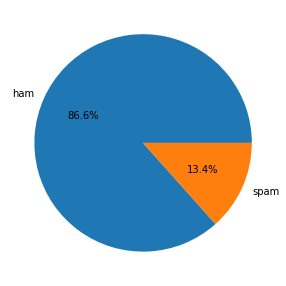

In [9]:
# Построение круговой диаграммы диаграммы
f=plt.figure(figsize=(7,5))
plt.pie(data['v1'].value_counts(),labels = data['v1'].unique(), autopct='%1.1f%%');

## Пункт 3

In [10]:
# Построение столбиковой диаграммы
ham_words = np.concatenate(data[data['v1'] == 'ham']['v2'].apply(lambda s: s.strip().split()).values)
spam_words = np.concatenate(data[data['v1'] == 'spam']['v2'].apply(lambda s: s.strip().split()).values)
words_series_ham = pd.Series(list(ham_words))
words_series_spam = pd.Series(list(spam_words))
top_words_ham = words_series_ham[words_series_ham.isin(words_series_ham.value_counts().head(10).index)]
top_words_spam = words_series_spam[words_series_spam.isin(words_series_spam.value_counts().head(10).index)]

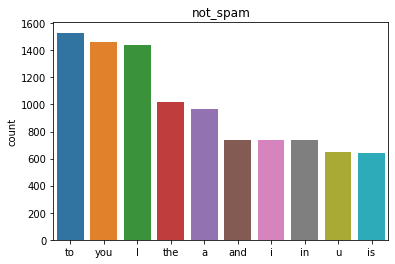

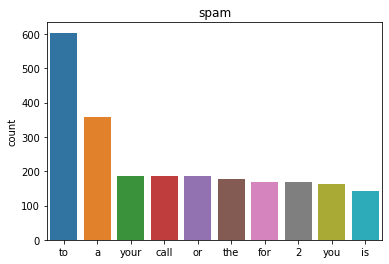

In [11]:
f=plt.figure(figsize=(6,4))
plt.title('not_spam')
sns.countplot(top_words_ham, order = top_words_ham.value_counts().index)
f=plt.figure(figsize=(6,4))
plt.title('spam')
sns.countplot(top_words_spam, order = top_words_spam.value_counts().index);

## Пункт 4

In [12]:
#remove stopwords
#data['v2'] = data['v2'].apply(removeStopWords)

In [14]:
#токенизация
tokenizer = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = tokenizer.fit_transform(data['v2'])

## Пункт 5

In [15]:
# Поиск оптимального параметра сглаживания
alpha_range = np.arange(0.01, 20, 0.05) 
data['v1'] = data['v1'].map({'ham' : 0, 'spam' : 1})
Y = data['v1']
X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size = 0.33, random_state = 17)

In [16]:
train_score = []
test_score = []
test_recall = []
test_precision = []
for alpha in alpha_range:
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_holdout)
    train_score.append(metrics.accuracy_score(y_train, y_pred_train))
    test_score.append(metrics.accuracy_score(y_holdout, y_pred_test))
    test_recall.append(metrics.recall_score(y_holdout, y_pred_test))
    test_precision.append(metrics.precision_score(y_holdout, y_pred_test))

In [17]:
matrix = np.matrix(np.c_[alpha_range, train_score, test_score, test_recall,
                        test_precision])
models = pd.DataFrame(data = matrix, columns=['alpha', 'train_accuracy',
                                             'test_accuracy','test_recall',
                                             'test_precision'])

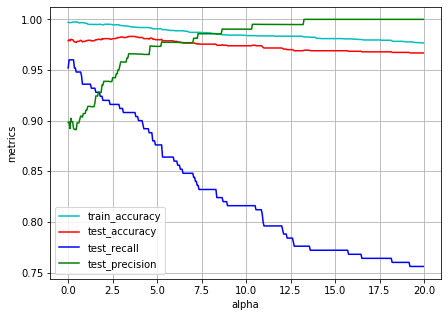

In [18]:
f=plt.figure(figsize=(7,5))
plt.plot(alpha_range, models['train_accuracy'], "c", label = 'train_accuracy')
plt.plot(alpha_range, models['test_accuracy'], "r", label = 'test_accuracy')
plt.plot(alpha_range, models['test_recall'], "b", label = 'test_recall')
plt.plot(alpha_range, models['test_precision'], "g", label = 'test_precision')
plt.ylabel('metrics')
plt.xlabel('alpha')
plt.legend()
plt.grid();

In [19]:
best_alpha = models['alpha'][models['test_precision'].idxmax()]
print(f'best alpha: {best_alpha:1.3f}')

best alpha: 13.260


In [20]:
#Обучим модель для последующих пунктов
clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_train, y_train);

## Пункт 6

In [21]:
# Построение матрицы ошибок
confusion_matrix = metrics.confusion_matrix(y_holdout, clf.predict(X_holdout)) 
pd.DataFrame(data  =  confusion_matrix,  columns  =  ['predicted  ham', 'predicted spam'], index = ['actual ham', 'actual spam']) 

,predicted ham,predicted spam
actual ham,1589,0
actual spam,56,194


## Пункт 7

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще,
а precision — способность отличать этот класс от других классов.

In [24]:
# Построим ROC кривую и рассчитаем площадь под ней
y_pred_pr = clf.predict_proba(X_holdout)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_holdout, y_pred_pr)
roc_auc = metrics.auc(fpr,tpr)

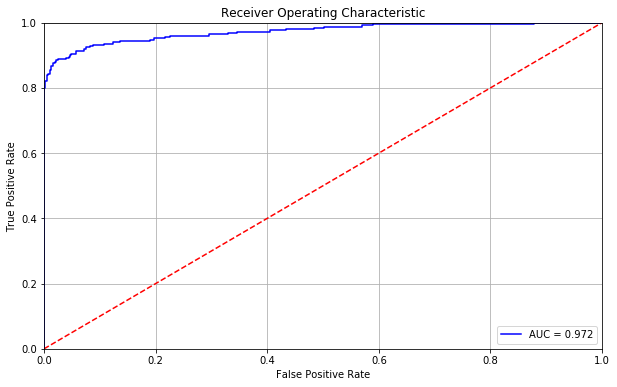

In [25]:
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:1.3f}')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('on')
plt.show()

## Пуннкт 8

Положительная константа C (или τ ) является управляющим параметром метода и позволяет находить компромисс между максимизацией разделяющей полосы и минимизацией суммарной ошибки.

In [26]:
C_range = np.arange(0.2, 3, 0.1)

In [27]:
train_score = []
test_score = []
test_recall = []
test_precision = []
for c in C_range:
    svm = SVC(C = c)
    svm.fit(X_train, y_train)
    y_pred_train = svm.predict(X_train)
    y_pred_holdout = svm.predict(X_holdout)
    test_precision.append(metrics.precision_score(y_holdout, y_pred_holdout, zero_division = 1))
    train_score.append(metrics.accuracy_score(y_train, y_pred_train))
    test_score.append(metrics.accuracy_score(y_holdout, y_pred_holdout))
    test_recall.append(metrics.recall_score(y_holdout, y_pred_holdout))

In [28]:
matrix = np.matrix(np.c_[C_range, train_score, test_score, test_recall,
                        test_precision])
models = pd.DataFrame(data = matrix, columns=['C', 'train_accuracy',
                                             'test_accuracy','test_recall',
                                             'test_precision'])

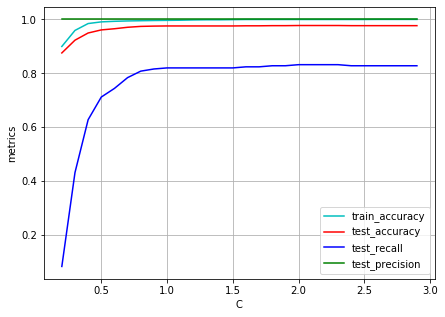

In [29]:
f=plt.figure(figsize=(7,5))
plt.plot(C_range, models['train_accuracy'], "c", label = 'train_accuracy')
plt.plot(C_range, models['test_accuracy'], "r", label = 'test_accuracy')
plt.plot(C_range, models['test_recall'], "b", label = 'test_recall')
plt.plot(C_range, models['test_precision'], "g", label = 'test_precision')
plt.ylabel('metrics')
plt.xlabel('C')
plt.legend()
plt.grid();

In [30]:
best_C = models['C'][models['test_recall'].idxmax()]
print(f'best C: {best_C:1.3f}')
#Обучим модель для последующих пунктов
svm = SVC(C = best_C, probability= True)
svm.fit(X_train, y_train);

best C: 2.000


## Пункт 9

In [31]:
# Построение матрицы ошибок
confusion_matrix = metrics.confusion_matrix(y_holdout, svm.predict(X_holdout)) 
pd.DataFrame(data  =  confusion_matrix,  columns  =  ['predicted  ham', 'predicted spam'], index = ['actual ham', 'actual spam']) 

,predicted ham,predicted spam
actual ham,1589,0
actual spam,42,208


In [32]:
# Построим ROC кривую и рассчитаем площадь под ней
y_pred_pr = svm.predict_proba(X_holdout)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_holdout, y_pred_pr)
roc_auc = metrics.auc(fpr,tpr)

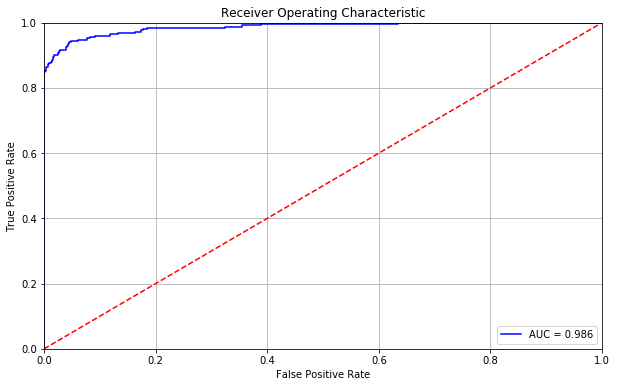

In [33]:
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:1.3f}')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('on')
plt.show()